# Compare Lexicons

We compare 3 ways to generate lexicons and streams: 1) ARC (ours), 2) Lexicons with randomly shuffled syllables, and 3) Reference lexicons from the literature. Each mode takes approx. 3min to compute on a MacBook Air M1.

In [35]:
from arc import load_phonemes, make_syllables, make_words
from arc import make_lexicons, load_words

import numpy as np 
import random

words = load_words("words.json")

In [71]:
from copy import copy
import pandas as pd
from arc.core.base_types import Register
import numpy as np

from arc.core.syllable import LABELS_C, LABELS_V, syllable_from_phonemes
from arc.core.word import Word, word_overlap_matrix

phonemes = load_phonemes()

syll_feature_labels = [LABELS_C, LABELS_V]
syllable_type = "cv"

def to_phoneme(phoneme):
    return phoneme

def to_syllable(syllable):
    if len(syllable) == 3 and not syllable.endswith("ː"):
        syllable_obj = syllable_from_phonemes(phonemes, syllable[:2], syll_feature_labels)
        syllable_obj.id = syllable
        return syllable_obj
    return syllable_from_phonemes(phonemes, syllable, syll_feature_labels)

def to_word(word):
    syllables_list = list(map(to_syllable, word))
    word_id = "".join(s.id for s in syllables_list)
    word_features = list(list(tup) for tup in zip(*[s.info["binary_features"] for s in syllables_list]))
    return Word(id=word_id, info={"binary_features": word_features}, syllables=syllables_list)

def to_lexicon(lexicon):
    word_objs_list = list(map(to_word, lexicon))
    lexicon = Register({w.id:  w for w in word_objs_list})
    lexicon.info.update({"syllable_feature_labels": [LABELS_C, LABELS_V],  "syllable_type": syllable_type})
    overlap = word_overlap_matrix(lexicon)
    lexicon.info["cumulative_feature_repetitiveness"] = np.triu(overlap, 1).sum()
    lexicon.info["max_pairwise_feature_repetitiveness"] = np.triu(overlap, 1).max()
    return lexicon

In [37]:
N_LEXICONS = 21  # number of lexicons per TP mode
N_WORDS_PER_LEXICON = 4  
N_REPS = 5  # how often to randomize the lexicon to build the total stream, 
            # i.e. how long will the streams be in lexicon lengths N_REPS*N_WORDS_PER_LEXICON = n words in the stream
N_STREAMS_PER_INPUT = 5

In [38]:
def print_stream_info(stream):
    print("Stream:", "|".join([syll.id for syll in stream]))
    print("TP mode:", stream.info["stream_tp_mode"])
    print("Lexicon:", stream.info["lexicon"])
    print("Feature PRIs:", stream.info["rhythmicity_indexes"])
    print("")

### ARC Lexicons

In [24]:
from arc import make_streams
from arc import make_lexicons, Register, load_phonemes, load_words

print("Load words...")
words = load_words("data_submission/words.json")

print("Make lexicons...")
controlled_lexicons = make_lexicons(words, n_lexicons=N_LEXICONS, n_words=N_WORDS_PER_LEXICON, control_features=True)
for lexicon in controlled_lexicons:
    print("Lexicon:", lexicon)
    print("Info:", lexicon.info)
    print("")

controlled_streams = Register()
for _ in range(N_STREAMS_PER_INPUT):
    for stream in make_streams(
        controlled_lexicons, 
        max_rhythmicity=None, 
        num_repetitions=N_REPS
        ):
        controlled_streams.append(stream)

for stream in controlled_streams:
    print_stream_info(stream)

len(controlled_streams)

Load words...
Make lexicons...


Lexicon: ɡaːfuːnɛː|ʃeːhoːbiː|riːvaːkoː|poːʃøːheː
Info: {'phoneme_feature_labels': ['syl', 'son', 'cons', 'cont', 'delrel', 'lat', 'nas', 'strid', 'voi', 'sg', 'cg', 'ant', 'cor', 'distr', 'lab', 'hi', 'lo', 'back', 'round', 'tense', 'long'], 'syllable_feature_labels': [['son', 'back', 'hi', 'lab', 'cor', 'cont', 'lat', 'nas', 'voi'], ['back', 'hi', 'lo', 'lab', 'tense', 'long']], 'syllable_type': 'cV', 'bigram_pval': None, 'bigrams_count': 1473, 'trigram_pval': None, 'trigrams_count': 21266, 'cumulative_feature_repetitiveness': 2, 'max_pairwise_feature_repetitiveness': 1}

Lexicon: heːtuːfyː|foːkuːlyː|kaːmeːzuː|nyːvaːkoː
Info: {'phoneme_feature_labels': ['syl', 'son', 'cons', 'cont', 'delrel', 'lat', 'nas', 'strid', 'voi', 'sg', 'cg', 'ant', 'cor', 'distr', 'lab', 'hi', 'lo', 'back', 'round', 'tense', 'long'], 'syllable_feature_labels': [['son', 'back', 'hi', 'lab', 'cor', 'cont', 'lat', 'nas', 'voi'], ['back', 'hi', 'lo', 'lab', 'tense', 'long']], 'syllable_type': 'cV', 'bigram_pval':

315

### Random / uncontrolled lexicons (baseline)

In [ ]:
random_lexicons = make_lexicons(words, n_lexicons=N_LEXICONS, n_words=N_WORDS_PER_LEXICON, control_features=False)
for lexicon in random_lexicons:
    print("Lexicon:", lexicon)
    print("Info:", lexicon.info)
    print("")

In [76]:
random_streams = Register()
for _ in range(N_STREAMS_PER_INPUT):
    for stream in make_streams(
        random_lexicons, 
        max_rhythmicity=None, 
        num_repetitions=N_REPS
        ):
        random_streams.append(stream)
for stream in random_streams:
    print_stream_info(stream)

len(random_streams)

Lexicon: nɛːfiːkuː|ʃoːɡaːmɛː|huːpoːʃiː|huːdeːfiː
Info: {'phoneme_feature_labels': ['syl', 'son', 'cons', 'cont', 'delrel', 'lat', 'nas', 'strid', 'voi', 'sg', 'cg', 'ant', 'cor', 'distr', 'lab', 'hi', 'lo', 'back', 'round', 'tense', 'long'], 'syllable_feature_labels': [['son', 'back', 'hi', 'lab', 'cor', 'cont', 'lat', 'nas', 'voi'], ['back', 'hi', 'lo', 'lab', 'tense', 'long']], 'syllable_type': 'cV', 'bigram_pval': None, 'bigrams_count': 1473, 'trigram_pval': None, 'trigrams_count': 21266}

Lexicon: kaːriːfyː|zuːɡiːmeː|zuːhoːbyː|koːnøːvaː
Info: {'phoneme_feature_labels': ['syl', 'son', 'cons', 'cont', 'delrel', 'lat', 'nas', 'strid', 'voi', 'sg', 'cg', 'ant', 'cor', 'distr', 'lab', 'hi', 'lo', 'back', 'round', 'tense', 'long'], 'syllable_feature_labels': [['son', 'back', 'hi', 'lab', 'cor', 'cont', 'lat', 'nas', 'voi'], ['back', 'hi', 'lo', 'lab', 'tense', 'long']], 'syllable_type': 'cV', 'bigram_pval': None, 'bigrams_count': 1473, 'trigram_pval': None, 'trigrams_count': 21266}

Lexi

315

### Reference lexicons from the literature

In [68]:
lexicons = [[['pi', 'ɾu', 'ta'],
  ['ba', 'ɡo', 'li'],
  ['to', 'ku', 'da'],
  ['ɡu', 'ki', 'bo']],
 [['pa', 'be', 'la'],
  ['di', 'ne', 'ka'],
  ['lu', 'fa', 'ri'],
  ['xi', 'so', 'du']],
 [['ma', 'xu', 'pe'],
  ['xe', 'ro', 'ɡa'],
  ['de', 'mu', 'si'],
  ['fo', 'le', 'ti']],
 [['pu', 'ke', 'mi'],
  ['ra', 'fi', 'nu'],
  ['bi', 'na', 'po'],
  ['me', 'do', 'xi']],
 [['no', 'ni', 'xe'],
  ['bu', 'lo', 'te'],
  ['re', 'mo', 'fu'],
  ['ko', 'tu', 'sa']],
 [['mi', 'lo', 'de'],
  ['da', 'le', 'bu'],
  ['no', 'ru', 'pa'],
  ['ka', 'te', 'xi']],
 [['ne', 'do', 'li'],
  ['ri', 'fo', 'nu'],
  ['ba', 'to', 'ɡu'],
  ['ki', 'ra', 'pu']],
 [['ɡo', 'na', 'be'],
  ['mu', 'di', 'la'],
  ['ro', 'ni', 'xe'],
  ['pi', 'ku', 'sa']],
 [['fu', 'bi', 're'],
  ['xe', 'tu', 'si'],
  ['ta', 'fi', 'ko'],
  ['ke', 'ma', 'po']],
 [['ti', 'fa', 'xu'],
  ['so', 'du', 'xi'],
  ['me', 'lu', 'bo'],
  ['ɡa', 'ni', 'pe']],
 [['mi', 'po', 'la'],
  ['za', 'bɛ', 'tu'],
  ['ʁo', 'ki', 'sɛ'],
  ['nu', 'ɡa', 'di']],
 [['dɛ', 'mʊ', 'ri'],
  ['sɛ', 'ni', 'ɡɛ'],
  ['ræ', 'ku', 'səʊ'],
  ['pi', 'lɛ', 'ru']],
 [['ki', 'fəʊ', 'bu'],
  ['lu', 'fɑ', 'ɡi'],
  ['pæ', 'beɪ', 'lɑ'],
  ['tɑ', 'ɡəʊ', 'fʊ']],
 [['bi', 'du', 'pɛ'],
  ['məʊ', 'bɑ', 'li'],
  ['rɛ', 'ɡæ', 'tʊ'],
  ['sæ', 'tɛ', 'kəʊ']],
 [['bəʊ', 'dɑ', 'mɛ'],
  ['fi', 'nəʊ', 'pɑ'],
  ['ɡʊ', 'rɑ', 'təʊ'],
  ['ləʊ', 'kæ', 'neɪ']],
 [['fɛ', 'si', 'nɑ'],
  ['kɛ', 'su', 'dəʊ'],
  ['mæ', 'pʊ', 'di'],
  ['ti', 'mi', 'nu']],
 [['tu', 'pi', 'ɹoʊ'],
  ['ɡoʊ', 'la', 'bu'],
  ['pa', 'doʊ', 'ti'],
  ['bi', 'da', 'ku']],
 [['meɪ', 'lu', 'ɡi'],
  ['ɹa', 'fi', 'nu'],
  ['pu', 'keɪ', 'mi'],
  ['toʊ', 'na', 'poʊ']],
 [['ɡoʊ', 'la', 'tu'],
  ['da', 'ɹoʊ', 'pi'],
  ['ti', 'bu', 'doʊ'],
  ['pa', 'bi', 'ku']],
 [['poʊ', 'fi', 'mu'],
  ['noʊ', 'vu', 'ka'],
  ['vi', 'koʊ', 'ɡa'],
  ['ba', 'fu', 'ɡi']],
 [['ma', 'nu', 'toʊ'],
  ['ni', 'moʊ', 'lu'],
  ['voʊ', 'ɹi', 'fa'],
  ['li', 'du', 'ɹa']]]

ref_lexicons = list(map(to_lexicon, lexicons))

for i, lex in enumerate(ref_lexicons):
    print(i, lex)

0 piɾuta|baɡoli|tokuda|ɡukibo
1 pabela|dineka|lufari|xisodu
2 maxupe|xeroɡa|demusi|foleti
3 pukemi|rafinu|binapo|medoxi
4 nonixe|bulote|remofu|kotusa
5 milode|dalebu|norupa|katexi
6 nedoli|rifonu|batoɡu|kirapu
7 ɡonabe|mudila|ronixe|pikusa
8 fubire|xetusi|tafiko|kemapo
9 tifaxu|soduxi|melubo|ɡanipe
10 mipola|zabɛtu|ʁokisɛ|nuɡadi
11 dɛmʊri|sɛniɡɛ|rækusəʊ|pilɛru
12 kifəʊbu|lufɑɡi|pæbeɪlɑ|tɑɡəʊfʊ
13 bidupɛ|məʊbɑli|rɛɡætʊ|sætɛkəʊ
14 bəʊdɑmɛ|finəʊpɑ|ɡʊrɑtəʊ|ləʊkæneɪ
15 fɛsinɑ|kɛsudəʊ|mæpʊdi|timinu
16 tupiɹoʊ|ɡoʊlabu|padoʊti|bidaku
17 meɪluɡi|ɹafinu|pukeɪmi|toʊnapoʊ
18 ɡoʊlatu|daɹoʊpi|tibudoʊ|pabiku
19 poʊfimu|noʊvuka|vikoʊɡa|bafuɡi
20 manutoʊ|nimoʊlu|voʊɹifa|liduɹa


In [73]:
ref_streams = Register()
for _ in range(N_STREAMS_PER_INPUT):
    for stream in make_streams(
        ref_lexicons, 
        max_rhythmicity=None, 
        num_repetitions=N_REPS
        ):
        ref_streams.append(stream)

for stream in ref_streams:
    print_stream_info(stream)

len(ref_streams)

Stream: pi|ki|bo|ɡo|ta|ɡu|ku|to|ɾu|ba|da|li|to|pi|ɡo|li|ba|ku|ta|ɾu|ki|ɡu|bo|da|ki|ku|pi|bo|ɡu|to|da|ɡo|ba|ɾu|li|ta|ba|ki|da|pi|ku|ɡo|to|bo|ta|li|ɡu|ɾu|ɡu|da|ba|ta|ɡo|ki|ɾu|pi|li|bo|to|ku|da|ta|pi|ɾu|to|ɡu|ki|ba|bo|ku|li|ɡo|bo|ɾu|ku|ki|li|da|ɡu|ɡo|pi|ta|to|ba|ɡo|ɾu|bo|pi|ba|to|li|ki|ta|da|ku|ɡu|ba|ɡu|li|ku|bo|ki|ɡo|da|ɾu|ta|pi|to|ki|pi|ɡu|ta|bo|ba|li|ɾu|da|to|ɡo|ku|ɾu|ɡo|ɡu|pi|da|bo|li|ta|ki|to|ba|ku|ba|pi|to|ta|ku|ɡo|bo|ki|ɾu|da|ɡu|li|pi|ta|to|ku|li|ba|ɡu|bo|ɡo|da|ɾu|ki|ɡo|ki|pi|ku|to|ta|bo|li|da|ba|ɾu|ɡu|ki|ɡu|ta|ɾu|ku|bo|to|da|pi|ɡo|ba|li|ɡu|to|ɾu|ba|ta|ku|ki|bo|da|ɡo|li|pi|ɾu|ɡo|to|bo|ba|ki|li|ku|ta|ɡu|pi|da|to|ki|ba|pi|ɡu|ɡo|ku|da|bo|ɾu|ta|li|to|ɡu|ɾu|bo|ta|ba|da|ki|ku|pi|li|ɡo|ta|ɡo|ɾu|li|bo|ɡu|da|ku|ba|to|pi|ki|ta|da|li|ki|to|ɡo|ɡu|ba|bo|ku|ɾu|pi|ba|ɡo|pi|bo|ɡu|ku|li|ɾu|to|da|ta|ki|da|bo|pi|ɡo|to|li|ɾu|ba|ta|ku|ɡu|ki|ɡo|pi|ɾu|ki|da|to|ɡu|li|bo|ba|ku|ta|pi|ki|ɡu|ba|bo|da|ɡo|li|to|ta|ɾu|ku|pi|da|li|ɡu|ku|ɾu|to|ba|ɡo|ki|ta|bo|ku|to|pi|li|ki|ba|ɾu|ɡo|ɡu|bo|ta|da|ɡu|pi|ta|ɡo|da|ba|to

315

### Collect Results

We collect all stream generation results and their feature repetitiveness scores in a dataframe.

In [77]:
import pandas as pd

data = {"Control": [], "Lexicon": [], "Feature": [], "PRI": [], "Stream TP mode": [], "Stream": []}

mode_to_mode = {  # TP-random position-random; TP-random position-fixed and TP-structured
    "random": "TP-random position-random",
    "word_structured": "TP-structured",
    "position_controlled": "TP-random position-fixed"
}

for control, streams in [("Controlled lexicons (ARC)", controlled_streams), ("Reference lexicons (Literature)", ref_streams), ("Random lexicons (Baseline)", random_streams)]:
    for stream in streams:
        for k, v in stream.info["rhythmicity_indexes"].items():
            data["Feature"].append(k)
            data["PRI"].append(v)
            data["Control"].append(control)
            data["Lexicon"].append(str(stream.info["lexicon"]))
            data["Stream TP mode"].append(mode_to_mode[stream.info["stream_tp_mode"]])
            data["Stream"].append("|".join(syll.id for syll in stream))
        data["Feature"].append("max")
        data["PRI"].append(max(stream.info["rhythmicity_indexes"].values()))
        data["Control"].append(control)
        data["Lexicon"].append(str(stream.info["lexicon"]))
        data["Stream TP mode"].append(mode_to_mode[stream.info["stream_tp_mode"]])
        data["Stream"].append("|".join(syll.id for syll in stream))

df = pd.DataFrame(data).sort_values(["Control", "Lexicon", "Stream TP mode"]).reset_index(drop=True)

import os
os.makedirs("results/", exist_ok=True)
df.to_csv("results/full_dataset.csv")

df

,Control,Lexicon,Feature,PRI,Stream TP mode,Stream
0,Controlled lexicons (ARC),biːʃuːhøː|loːfaːɡiː|foːheːtɛː|doːhiːvaː,phon_1_son,0.039216,TP-random position-fixed,foː|hiː|høː|loː|faː|tɛː|doː|ʃuː|vaː|biː|heː|ɡi...
1,Controlled lexicons (ARC),biːʃuːhøː|loːfaːɡiː|foːheːtɛː|doːhiːvaː,phon_1_back,0.033613,TP-random position-fixed,foː|hiː|høː|loː|faː|tɛː|doː|ʃuː|vaː|biː|heː|ɡi...
2,Controlled lexicons (ARC),biːʃuːhøː|loːfaːɡiː|foːheːtɛː|doːhiːvaː,phon_1_hi,0.033613,TP-random position-fixed,foː|hiː|høː|loː|faː|tɛː|doː|ʃuː|vaː|biː|heː|ɡi...
3,Controlled lexicons (ARC),biːʃuːhøː|loːfaːɡiː|foːheːtɛː|doːhiːvaː,phon_1_lab,0.058824,TP-random position-fixed,foː|hiː|høː|loː|faː|tɛː|doː|ʃuː|vaː|biː|heː|ɡi...
4,Controlled lexicons (ARC),biːʃuːhøː|loːfaːɡiː|foːheːtɛː|doːhiːvaː,phon_1_cor,0.060224,TP-random position-fixed,foː|hiː|høː|loː|faː|tɛː|doː|ʃuː|vaː|biː|heː|ɡi...
...,...,...,...,...,...,...
15115,Reference lexicons (Literature),ɡoʊlatu|daɹoʊpi|tibudoʊ|pabiku,phon_2_lo,0.138655,TP-structured,pa|bi|ku|da|ɹoʊ|pi|ɡoʊ|la|tu|ti|bu|doʊ|ɡoʊ|la|...
15116,Reference lexicons (Literature),ɡoʊlatu|daɹoʊpi|tibudoʊ|pabiku,phon_2_lab,0.149860,TP-structured,pa|bi|ku|da|ɹoʊ|pi|ɡoʊ|la|tu|ti|bu|doʊ|ɡoʊ|la|...
15117,Reference lexicons (Literature),ɡoʊlatu|daɹoʊpi|tibudoʊ|pabiku,phon_2_tense,0.000000,TP-structured,pa|bi|ku|da|ɹoʊ|pi|ɡoʊ|la|tu|ti|bu|doʊ|ɡoʊ|la|...
15118,Reference lexicons (Literature),ɡoʊlatu|daɹoʊpi|tibudoʊ|pabiku,phon_2_long,0.000000,TP-structured,pa|bi|ku|da|ɹoʊ|pi|ɡoʊ|la|tu|ti|bu|doʊ|ɡoʊ|la|...


In [90]:
# There is always randomness in the generation of the lexicons etc., so if you want the exact data from the publication uncomment below 
# df = pd.read_csv("data_submission/full_dataset.csv")

df_lexicons = df[["Control", "Lexicon"]].drop_duplicates().reset_index(drop=True)
df_lexicons.to_csv("results/all_lexicons.csv")
df_lexicons

,Control,Lexicon
0,Controlled lexicons (ARC),hoːzuːpeː|bøːhuːzyː|roːfaːkøː|kuːfyːriː
1,Controlled lexicons (ARC),muːkoːzɛː|fiːloːɡyː|doːheːfaː|kaːfuːnɛː
2,Controlled lexicons (ARC),faːtɛːheː|ʃeːhuːpaː|ruːfoːɡɛː|køːvaːnɛː
3,Controlled lexicons (ARC),hoːzuːpeː|bøːhuːzyː|kuːfyːriː|ruːvaːkoː
4,Controlled lexicons (ARC),hoːzyːbeː|moːkaːzuː|tɛːheːfoː|koːfuːnyː
...,...,...
58,Random lexicons (Baseline),huːʃoːbaː|deːfyːhoː|ʃuːhoːpaː|hoːʃiːbyː
59,Random lexicons (Baseline),nyːvaːkuː|koːnuːvaː|huːtoːvaː|faːɡiːroː
60,Random lexicons (Baseline),ɡiːfoːlaː|koːreːfiː|zuːhiːbaː|myːkoːzuː
61,Random lexicons (Baseline),kaːfuːriː|zuːhoːbaː|loːkaːfyː|faːkuːnɛː


In [87]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from pingouin import ttest

# There is always randomness in the generation of the lexicons etc., so if you want the exact data from the publication uncomment below 
# df = pd.read_csv("data_submission/full_dataset.csv")

tp_modes_pretty = ["TP-random position-random", "TP-random position-fixed", "TP-structured"]
dfs = []

for i, tp_mode in enumerate(tp_modes_pretty):
    df2 = df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")]
    cat1 = df2[df2['Control']=='Controlled lexicons (ARC)']["PRI"]
    cat2 = df2[df2['Control']=='Reference lexicons (Literature)']["PRI"]
    this = ttest(list(cat1), list(cat2), alternative="less")
    this.index = [f"controlled vs. reference {tp_mode}"]
    dfs.append(this)

print("")

for i, tp_mode in enumerate(tp_modes_pretty):
    df2 = df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")]
    cat1 = df2[df2['Control']=='Controlled lexicons (ARC)']["PRI"]
    cat2 = df2[df2['Control']=='Random lexicons (Baseline)']["PRI"]
    this = ttest(list(cat1), list(cat2), alternative="less")
    this.index = [f"controlled vs. random baseline {tp_mode}"]
    dfs.append(this)

print("")

for i, tp_mode in enumerate(tp_modes_pretty):
    df2 = df[(df["Stream TP mode"] == tp_mode) & (df["Feature"] == "max")]
    cat1 = df2[df2['Control']=='Reference lexicons (Literature)']["PRI"]
    cat2 = df2[df2['Control']=='Random lexicons (Baseline)']["PRI"]
    this = ttest(list(cat1), list(cat2), alternative="less")
    this.index = [f"reference vs. random baseline {tp_mode}"]
    dfs.append(this)

ttest_df = pd.concat(dfs)

display(ttest_df)

ttest_df.to_csv("results/ttest_results.csv")

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
controlled vs. reference TP-random position-random,3.882969,208,less,9.999307e-01,"[-inf, 0.01]",0.535901,0.003,1.741128e-08
controlled vs. reference TP-random position-fixed,-10.791692,208,less,3.784152e-22,"[-inf, -0.09]",1.489395,8.808e+18,1.000000e+00
controlled vs. reference TP-structured,-7.593797,208,less,5.171142e-13,"[-inf, -0.08]",1.048044,1.269e+10,1.000000e+00
controlled vs. random baseline TP-random position-random,0.847309,208,less,8.011016e-01,"[-inf, 0.0]",0.116940,0.421,6.397686e-03
controlled vs. random baseline TP-random position-fixed,-10.038871,208,less,6.847899e-20,"[-inf, -0.26]",1.385496,5.593e+16,1.000000e+00
controlled vs. random baseline TP-structured,-13.628123,208,less,6.034789e-31,"[-inf, -0.32]",1.880860,3.572e+27,1.000000e+00
reference vs. random baseline TP-random position-random,-2.811547,208,less,2.700955e-03,"[-inf, -0.0]",0.388030,11.744,8.764722e-01
reference vs. random baseline TP-random position-fixed,-6.103419,208,less,2.504083e-09,"[-inf, -0.14]",0.842352,3.941e+06,9.999955e-01
reference vs. random baseline TP-structured,-8.879939,208,less,1.579211e-16,"[-inf, -0.21]",1.225548,3.075e+13,1.000000e+00


## Example ARC Lexicon From Appendix

In [81]:
example_arc_lexicon = to_lexicon([["heː", "doː", "faː"], ["riː", "foː", "ɡyː"], ["ʃuː", "hiː", "boː"], ["vaː", "kuː", "niː"]])
print("Example Lexicon:", example_arc_lexicon)

streams = make_streams(
        [example_arc_lexicon], 
        max_rhythmicity=None, 
        num_repetitions=N_REPS
        )

for stream in streams:
        print_stream_info(stream)

Example Lexicon: heːdoːfaː|riːfoːɡyː|ʃuːhiːboː|vaːkuːniː
Stream: faː|ʃuː|niː|ɡyː|kuː|riː|hiː|vaː|foː|doː|boː|heː|ʃuː|riː|ɡyː|vaː|niː|boː|kuː|faː|hiː|foː|heː|doː|heː|hiː|faː|niː|foː|ʃuː|boː|doː|kuː|vaː|ɡyː|riː|foː|ɡyː|niː|riː|doː|vaː|boː|hiː|heː|faː|kuː|ʃuː|hiː|niː|doː|ʃuː|faː|ɡyː|heː|vaː|kuː|foː|riː|boː|riː|heː|foː|niː|ʃuː|vaː|doː|ɡyː|hiː|kuː|boː|faː|boː|foː|faː|vaː|ʃuː|doː|hiː|riː|niː|heː|kuː|ɡyː|faː|heː|riː|kuː|doː|foː|vaː|hiː|ʃuː|ɡyː|boː|niː|faː|foː|boː|ʃuː|kuː|hiː|ɡyː|doː|riː|vaː|heː|niː|hiː|boː|vaː|riː|faː|doː|niː|kuː|heː|ɡyː|ʃuː|foː|kuː|niː|vaː|faː|riː|ʃuː|heː|boː|ɡyː|foː|hiː|doː|faː|vaː|kuː|doː|foː|heː|boː|niː|hiː|ʃuː|ɡyː|riː|niː|faː|boː|riː|vaː|hiː|doː|ʃuː|kuː|foː|ɡyː|heː|riː|foː|faː|doː|niː|boː|ʃuː|vaː|ɡyː|kuː|heː|hiː|ɡyː|doː|vaː|heː|faː|ʃuː|hiː|riː|kuː|boː|foː|niː|ʃuː|boː|faː|niː|doː|riː|hiː|heː|foː|kuː|ɡyː|vaː|niː|vaː|doː|ɡyː|hiː|kuː|riː|faː|heː|ʃuː|foː|boː|doː|kuː|faː|foː|hiː|niː|heː|ɡyː|ʃuː|riː|boː|vaː|boː|kuː|ʃuː|heː|niː|ɡyː|foː|riː|doː|faː|hiː|vaː|ʃuː|niː|foː|vaː|riː|heː

## Plots from the Paper

In [83]:
import matplotlib as mpl

mpl.rcParams["axes.titlesize"] = 14.
mpl.rcParams["axes.labelsize"] = 12.
mpl.rcParams["axes.titleweight"] = "bold"
mpl.rcParams["axes.labelweight"] = "normal"
mpl.rcParams['font.sans-serif'] = "Arial"

cm = 1/2.54  # centimeters in inches

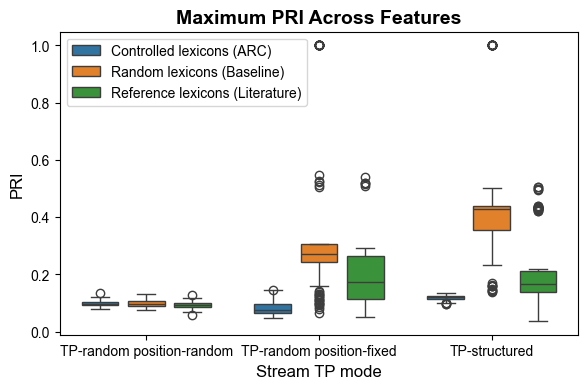

In [86]:
tp_modes_pretty = ["TP-random position-random", "TP-random position-fixed", "TP-structured"]

df = pd.read_csv("data_submission/")

_, ax = plt.subplots(figsize=(17*cm, 10*cm))
sns.boxplot(df[df["Feature"] == "max"], x="Stream TP mode", y="PRI", hue="Control", order=tp_modes_pretty, gap=0.2)
plt.title("Maximum PRI Across Features")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=labels)

plt.savefig("results/lexicon_pris_summary.pdf", dpi=600)

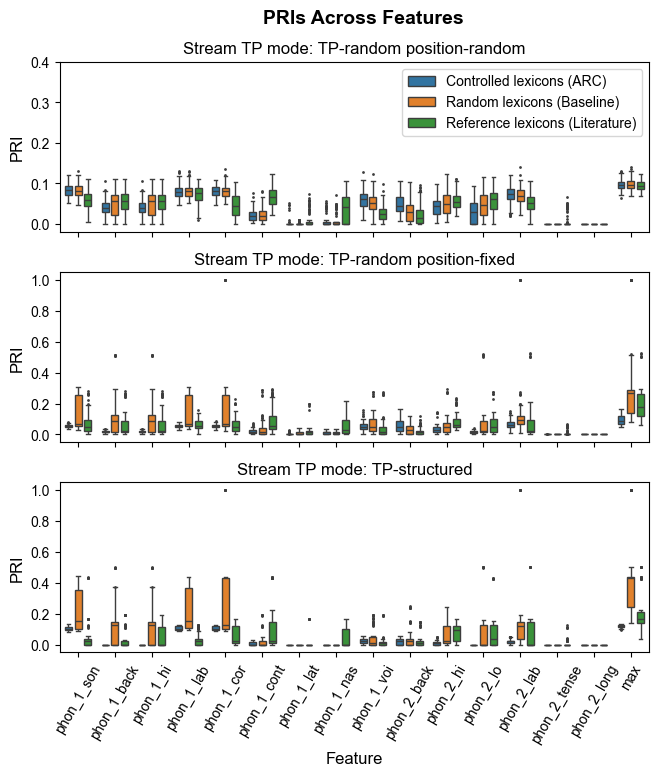

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

_, axs = plt.subplots(3, 1, figsize=(17*cm, 20*cm), layout="tight", sharex=True)
labels = ['Controlled\nlexicons (ARC)',
 'Reference\nlexicons (Literature)',
 'Random\nlexicons (Baseline)']

for i, tp_mode in enumerate(tp_modes_pretty):
    sns.boxplot(df[df["Stream TP mode"] == tp_mode], x="Feature", y="PRI", hue="Control", ax=axs[i], fliersize=1, gap=0.3)
    axs[i].set_title(f"Stream TP mode: {tp_mode}", weight="normal", size=12)
    if i == 0:
        axs[i].set(ylim=(-0.02, 0.4))
        # axs[i].legend(labels)
        # sns.move_legend(axs[i], "upper left", bbox_to_anchor=(1, 1))
        sns.move_legend(axs[i], "upper left")
        handles, labels = axs[i].get_legend_handles_labels()
        axs[i].legend(handles=handles, labels=labels)
        
    else:
        axs[i].legend([],[], frameon=False)
locs, labls = plt.xticks()
plt.xticks(locs, labls, rotation=60)
plt.suptitle(f"PRIs Across Features", weight="bold", size=14, x=0.55)
plt.savefig("lexicon_pri.pdf", dpi=600)

In [24]:
df_max = df[(df["Feature"] == "max") & (df["Control"] == "Controlled lexicons (ARC)") & (df["Stream TP mode"] == mode_to_mode["word_structured"])]
df_best = df_max[df_max.PRI == df_max.PRI.min()]
display(df_best)
best_lexicon = list(df_best["Lexicon"])[0]

for stream in controlled_streams:
    if str(stream.info["lexicon"]) == best_lexicon:
        print("Lexicon:", stream.info["lexicon"])
        print("Stream:", "|".join(syll.id for syll in stream))
        print("Stream TP mode:", mode_to_mode[stream.info["stream_tp_mode"]])
        print(stream.info["rhythmicity_indexes"])
        print("Max PRI:", max(stream.info["rhythmicity_indexes"].values()))
        print("")


,Control,Lexicon,Feature,PRI,Stream TP mode,Stream
3311,Controlled lexicons (ARC),kaːzuːmyː|riːɡaːfuː|heːbiːʃøː|beːhoːʃiː,max,0.096639,TP-structured,riː|ɡaː|fuː|heː|biː|ʃøː|beː|hoː|ʃiː|kaː|zuː|my...


Lexicon: kaːzuːmyː|riːɡaːfuː|heːbiːʃøː|beːhoːʃiː
Stream: beː|ɡaː|riː|zuː|heː|ʃøː|myː|fuː|hoː|kaː|ʃiː|biː|hoː|biː|zuː|riː|beː|fuː|ʃøː|kaː|heː|ʃiː|myː|ɡaː|fuː|riː|kaː|ɡaː|hoː|myː|heː|zuː|beː|biː|ʃøː|ʃiː|ʃøː|zuː|ɡaː|myː|kaː|hoː|beː|riː|fuː|heː|biː|ʃiː|riː|hoː|heː|ɡaː|ʃiː|kaː|zuː|fuː|myː|biː|beː|ʃøː|hoː|ʃøː|riː|ʃiː|ɡaː|zuː|kaː|myː|beː|heː|fuː|biː|fuː|zuː|hoː|ɡaː|heː|kaː|riː|biː|myː|ʃøː|beː|ʃiː|fuː|ɡaː|biː|kaː|ʃøː|heː|beː|myː|zuː|ʃiː|hoː|riː|myː|riː|ɡaː|beː|kaː|fuː|ʃiː|heː|hoː|zuː|ʃøː|biː|riː|heː|myː|hoː|ʃiː|beː|zuː|biː|ɡaː|ʃøː|fuː|kaː|biː|heː|riː|ʃøː|ɡaː|kaː|beː|hoː|fuː|myː|ʃiː|zuː|myː|riː|ʃøː|ɡaː|kaː|heː|fuː|beː|ʃiː|hoː|zuː|biː|kaː|myː|beː|heː|ʃiː|ʃøː|biː|hoː|riː|ɡaː|zuː|fuː|heː|myː|hoː|biː|fuː|ɡaː|ʃiː|riː|zuː|kaː|ʃøː|beː|hoː|beː|ʃøː|riː|biː|heː|zuː|ɡaː|myː|fuː|kaː|ʃiː|heː|beː|kaː|riː|myː|ʃiː|fuː|ʃøː|zuː|hoː|ɡaː|biː|ɡaː|heː|ʃøː|kaː|biː|myː|zuː|ʃiː|beː|fuː|riː|hoː|ʃøː|fuː|ʃiː|biː|zuː|riː|beː|myː|heː|hoː|kaː|ɡaː|ʃøː|hoː|fuː|biː|ʃiː|ɡaː|riː|heː|kaː|beː|zuː|myː|kaː|hoː|heː|ɡaː|fuː|zuː|ʃøː|myː

## Visualization of Feature Overlap

In [28]:
for i, lex in enumerate(ref_lexicons):
    print(i, lex)

0 piɾuta|baɡoli|tokuda|ɡukibo
1 pabela|dineka|lufari|xisodu
2 maxupe|xeroɡa|demusi|foleti
3 pukemi|rafinu|binapo|medoxi
4 nonixe|bulote|remofu|kotusa
5 milode|dalebu|norupa|katexi
6 nedoli|rifonu|batoɡu|kirapu
7 ɡonabe|mudila|ronixe|pikusa
8 fubire|xetusi|tafiko|kemapo
9 tifaxu|soduxi|melubo|ɡanipe
10 mipola|zabɛtu|ʁokisɛ|nuɡadi
11 dɛmʊri|sɛniɡɛ|rækusəʊ|pilɛru
12 kifəʊbu|lufɑɡi|pæbeɪlɑ|tɑɡəʊfʊ
13 bidupɛ|məʊbɑli|rɛɡætʊ|sætɛkəʊ
14 bəʊdɑmɛ|finəʊpɑ|ɡʊrɑtəʊ|ləʊkæneɪ
15 fɛsinɑ|kɛsudəʊ|mæpʊdi|timinu
16 tupiɹoʊ|ɡoʊlabu|padoʊti|bidaku
17 meɪluɡi|ɹafinu|pukeɪmi|toʊnapoʊ
18 ɡoʊlatu|daɹoʊpi|tibudoʊ|pabiku
19 poʊfimu|noʊvuka|vikoʊɡa|bafuɡi
20 manutoʊ|nimoʊlu|voʊɹifa|liduɹa


In [33]:
lex = ref_lexicons[16]
lex['tupiɹoʊ'], lex['bidaku'], lex['ɡoʊlabu'], lex['padoʊti']

(Word(id='tupiɹoʊ', info={'binary_features': [[0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 1], [0, 0, 1], [0, 0, 0], [0, 0, 0], [0, 0, 1], [1, 0, 1], [1, 1, 0], [0, 0, 0], [1, 0, 0], [1, 1, 1], [0, 0, 0]]}, syllables=[Syllable(id='tu', info={'binary_features': [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0], 'phonotactic_features': [['plo', 'den'], ['u']]}, phonemes=[Phoneme(id='t', info={'features': ['-', '-', '+', '-', '-', '-', '-', '-', '-', '-', '-', '+', '+', '-', '-', '-', '-', '-', '-', '0', '-']}), Phoneme(id='u', info={'features': ['+', '+', '-', '+', '-', '-', '-', '0', '+', '-', '-', '-', '-', '-', '+', '+', '-', '+', '+', '+', '-']})]), Syllable(id='pi', info={'binary_features': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 'phonotactic_features': [['plo', 'lab'], ['i']]}, phonemes=[Phoneme(id='p', info={'features': ['-', '-', '+', '-', '-', '-', '-', '0', '-', '-', '-', '+', '-', '0', '+', '-', '-', '-', '-', '0', '-']}), Phoneme(id='i', info={'features': ['+', '+', 

In [35]:
for i, lex in enumerate(controlled_lexicons):
    print(i, lex)

0 hiːtoːfuː|kuːfaːnɛː|biːhuːzyː|roːfiːkɛː
1 hiːtoːfuː|roːfaːkøː|biːhuːzyː|fiːtyːhoː
2 kaːzuːmyː|foːheːtɛː|nuːkɛːfaː|ʃoːbiːhuː
3 hoːdeːvaː|kaːfiːluː|biːhuːzyː|loːfaːkøː
4 kaːzuːmyː|ruːkoːfyː|biːhuːzyː|heːvaːtuː
5 fiːtoːhuː|foːheːtɛː|reːfyːɡiː|hoːzyːbuː
6 ʃeːhoːbiː|kaːzuːmyː|reːvaːkoː|fyːhiːtɛː
7 hiːtoːfuː|kɛːfiːraː|vaːroːɡɛː|ʃuːɡiːmyː
8 kaːzuːmyː|heːbiːʃøː|ruːkoːfyː|fuːroːɡɛː
9 byːhoːzɛː|kaːfiːluː|riːfyːkoː|huːzyːpeː
10 nyːfuːɡaː|biːhuːzyː|køːnuːfoː|vaːtoːheː
11 zuːheːpiː|fiːnuːkaː|ɡiːfaːryː|huːʃoːbyː
12 hiːtoːfuː|fyːkoːnɛː|nyːfoːkuː|ʃøːheːpiː
13 hiːtoːfuː|kuːfaːnɛː|raːfiːkɛː|biːhuːzyː
14 byːhoːzɛː|ɡaːreːfyː|poːʃuːhiː|nyːfoːkuː
15 zuːheːpiː|kaːfoːreː|nyːfuːɡaː|fiːtoːhuː
16 hoːdeːvaː|kaːfiːluː|ruːfaːkoː|biːhuːzyː
17 kaːzuːmyː|riːɡaːfuː|heːbiːʃøː|beːhoːʃiː
18 riːɡaːfuː|biːhuːzyː|ʃiːbøːheː|ɡiːlyːfaː
19 riːkaːfoː|biːhuːzyː|fuːtoːhiː|ʃaːmyːkoː
20 heːfaːtɛː|hiːtoːfuː|ʃiːbeːhoː|biːhuːʃoː


In [ ]:
# Figure 2
# FIGURE REPRESENTING BINARY FEATURE MATRIX FOR THE LEXICON WORDS (LAG = 3)
L = [labls[i] for i in range(len(labls)) if labls[i] in lbl_C]
L.extend([labls[i] for i in range(len(labls)) if labls[i] in lbl_V])
#!!! L = lbl_C[:]
#!!! L.extend(lbl_V)
C_a = [(0.0000, 0.4470, 0.7410), 
       (0.8500, 0.3250, 0.0980), 
       (0.9290, 0.6940, 0.1250), 
       (0.4940, 0.1840, 0.5560)]
C_b = [(0.4660, 0.6740, 0.1880),
       (0.3010, 0.7450, 0.9330),
       (0.6350, 0.0780, 0.1840),
       (0.4940, 0.3294, 0.6196)]
fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
for iLexi in range(len(Lexicons)):
    V = np.transpose(np.matrix(Feats_by_sylls[iLexi]))
    G = np.zeros((V.shape[0],V.shape[1],3))
    G[V == 1] = [1.0,1.0,1.0]
    G[V == 0] = [0.5,0.5,0.5]
    if iLexi == 0:
        ax1.imshow(G, interpolation = 'nearest')
    else:
        ax2.imshow(G, interpolation = 'nearest')
    for b in BB[iLexi]:
        y_pos = b[0] - 0.5
        y_width = 1
        for l in b[1]:
            x_pos = l*nPoss - 0.5
            x_width = nPoss
            r = patches.Rectangle((x_pos, y_pos), x_width, y_width,
                                  linewidth = 3, edgecolor = 'r', facecolor = 'none')
            if iLexi == 0:
                ax1.add_patch(r)
            else:
                ax2.add_patch(r)
fig.supxlabel('Syllables', x = 0.51, fontsize = 12, fontname = 'Arial')
fig.supylabel('Features', fontsize = 12, fontname = 'Arial')
fig.suptitle('Feature Overlap', x = 0.51, y = 0.95, 
             fontsize = 14, fontweight = 'bold', fontname = 'Arial')
#!!! ax1.axhline(len(lbl_C) + 0.5, linestyle = '--', color = 'black')
#!!! ax2.axhline(len(lbl_C) + 0.5, linestyle = '--', color = 'black')
ax1.axhline(len(lbl_C) - 0.5, linestyle = '--', color = 'black')
ax2.axhline(len(lbl_C) - 0.5, linestyle = '--', color = 'black')
ax1.set_xlabel('ARC lexicon', fontsize = 12, fontname = 'Arial')
ax2.set_xlabel('Reference lexicon', fontsize = 12, fontname = 'Arial')
ax1.set_xticks(range(nSyll), [i for j in Lexicons[0] for i in j])
ax2.set_xticks(range(nSyll), [i for j in Lexicons[1] for i in j])
ax1.set_yticks(range(len(L)), L, fontname = 'Arial')
ax1.tick_params(length = 0)
ax2.tick_params(length = 0)
for i in range(nPoss):
    ax1.axvline(nPoss*(i+1)-0.5, linewidth = 2, linestyle = '--', color = C_a[i])
    ax2.axvline(nPoss*(i+1)-0.5, linewidth = 2, linestyle = '--', color = C_b[i])
for i in range(nTrip):
    for j in range(nPoss):
        ax1.get_xticklabels()[i*nPoss+j].set_color(C_a[i])
        ax2.get_xticklabels()[i*nPoss+j].set_color(C_b[i])
opdir = project_dir + '03_Figures/'
f_out = opdir + 'titone_stimuli_v4_feature.pdf'
plt.show()
fig.savefig(f_out, bbox_inches = 'tight', dpi = 600)


In [ ]:
#%%#################################################################################################
############################### TRANSITIONAL PROBABILITY: STATISTICS (Figure 5) ###############################
####################################################################################################

# # IMPORT STREAMS FROM TITONE, MILOSEVIC & MEYER (2024) ARC PACKAGE
# indir = project_dir + '04_Resources/00_Datasets/02_ARC_output/'
# fname = indir + 'best_lexicon.txt'
# fdata = list(csv.reader(open(fname, "r")))
# lexicon_words = fdata[0][0].split(": ")[1].split("|")
# lexicon_sylls = [list(map(''.join, zip(*[iter(i)]*nPoss))) for i in lexicon_words]
# TP_posrdm_arc = fdata[2][0].split(": ")[1].split("|")
# TP_struct_arc = fdata[7][0].split(": ")[1].split("|")
# TP_posfix_arc = fdata[12][0].split(": ")[1].split("|")
# TP_stream_arc = [TP_struct_arc, TP_posfix_arc, TP_posrdm_arc]
# TP_fnames_arc = ['TP_struct_ARC', 'TP_posfix_ARC', 'TP_posrdm_ARC']

# # COMPUTE INCREMENTAL TRANSITION MATRIX FOR EACH STREAM IN EACH METHOD
# PRW = []
# for trial in TP_stream_arc:
#     sylls = list(set(trial))
#     items = trial[:]
#     for iSyll in range(nSyll):
#         idxes = np.where(np.array(trial) == sylls[iSyll])[0].tolist()
#         for i_idx in idxes:
#             items[i_idx] = iSyll
#     PRW.append(items)
# SHF = []
# SHF.append(shuffled_random_stream(nSyll, nReps))
# SHF.append(shuffled_struct_srteam(nTrip, nSyll, nReps))
# Incremental_TPs = []
# for method in [PRW, SHF]:
#     R = []
#     for condition in method:
#         items = condition[:]
#         r = []
#         for iSyll in range(1, len(items)):
#             k = transitional_p_matrix(items[:iSyll+1])
#             r.append(k[items[iSyll-1]][items[iSyll]])
#         plt.scatter(range(len(r)), r)
#         R.append(r)
#     plt.show()
#     Incremental_TPs.append(R)

# # SAVE INCREMENTAL TP MATRIX FOR ALL STREAMS
# opdir = project_dir + '01_Stimuli/04_Streams/'
# fname = opdir + 'Incremental_TPs.pickle'
# fdata = Incremental_TPs
# with open(fname, 'wb') as f:
#     pickle.dump(fdata, f, pickle.HIGHEST_PROTOCOL)
    
# LOAD INCREMENTAL TP MATRIX FOR ALL STREAMS
indir = project_dir + '01_Stimuli/04_Streams/'
fname = indir + 'Incremental_TPs.pickle'
with open(fname, 'rb') as f:
    fdata = pickle.load(f)
Incremental_TPs = fdata

# PLOT INCREMENTAL TP MATRIX FOR ALL STREAMS
opdir = project_dir + '03_Figures/'
f_out = opdir + 'titone_results_v3_TP_stream.pdf'
groups = [r'Shuffling', r'ARC PRW']
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, layout = 'tight')
y_ax1 = Incremental_TPs[1][0]
y_ax3 = Incremental_TPs[1][1]
ax1.scatter(range(len(y_ax1)), y_ax1, color = 'r')
ax3.scatter(range(len(y_ax3)), y_ax3, color = 'r')
y_ax1 = Incremental_TPs[0][2]
y_ax2 = Incremental_TPs[0][1]
y_ax3 = Incremental_TPs[0][0]
ax1.scatter(range(len(y_ax1)), y_ax1, color = 'b')
ax2.scatter(range(len(y_ax2)), y_ax2, color = 'b')
ax3.scatter(range(len(y_ax3)), y_ax3, color = 'b')
ax1.set_title(r'TP-random position-random', fontsize = 12, fontname = 'Arial')
ax2.set_title(r'TP-random position-fixed', fontsize = 12, fontname = 'Arial')
ax3.set_title(r'TP-structured', fontsize = 12, fontname = 'Arial')
ax3.set_xlabel(r'Stream locations', fontsize = 12, fontname = 'Arial')
ax2.set_ylabel(r'TPs', fontsize = 12, fontname = 'Arial')
ax1.axhline(0.09, linestyle = '--', color = 'black')
ax2.axhline(0.25, linestyle = '--', color = 'black')
ax3.axhline(0.33, linestyle = '--', color = 'black')
ax1.set_yticks([0.09, 1])
ax2.set_yticks([0.25, 1])
ax3.set_yticks([0.33, 1])
ax1.set_xticks([])
ax2.set_xticks([])
ax1.set_ylim([0, 1])
ax2.set_ylim([0, 1])
ax3.set_ylim([0, 1])
fig.suptitle('Incremental TPs', x = 0.55, y = 1, 
             fontsize = 14, fontname = 'Arial', fontweight = 'bold')
fig.legend(groups, prop={'family':'Arial', 'size':12})
plt.show()
fig.savefig(f_out, bbox_inches = 'tight', dpi = 600)

# RUN LEVENE TEST TO COMPARE VARIANCE OF TP MATRICES
L_struct = stats.levene(Incremental_TPs[0][0][2::3], Incremental_TPs[1][1][2::3], center = 'mean')
L_random = stats.levene(Incremental_TPs[0][2], Incremental_TPs[1][0], center = 'mean')

In [ ]:
#%%#################################################################################################
############################# PLOTTING N-GRAMS FREQUENCY DISTRIBUTIONS (Figure 3) #############################
####################################################################################################

# PLOT N-GRAM FREQUENCY DISTRIBUTION OF SYLLABLES AND PHONEMES
opdir = project_dir + '03_Figures/'
f_out = opdir + 'titone_results_v3_ngrams.pdf'
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, layout = "constrained")

# SYLLABLES FREQUENCY DISTRIBUTION
ax1.plot(freqs, color = 'black')
ax1.set_title('Unigrams', fontsize = 12, fontname = 'Arial')
ax1.set_xticks((0, len(freqs)))
ax1.set_yticks((0, freqs[0]))
ax1.set_ylabel('Syllable/Phoneme' + '\n' + 'Frequency', fontsize = 12, fontname = 'Arial')

# BIGRAM FREQUENCY DISTRIBUTION
ax2.plot(freq2, color = 'black')
ax2.set_title('Bigrams', fontsize = 12, fontname = 'Arial')
ax2.set_xticks((0, len(freq2)))
ax2.set_yticks((0, freq2[0]))
ax2.set_xlabel('Rank', fontsize = 12, fontname = 'Arial')

# TRIGRAM FREQUENCY DISTRIBUTION
ax3.plot(freq3, color = 'black')
ax3.set_title('Trigrams', fontsize = 12, fontname = 'Arial')
ax3.set_xticks((0, len(freq3)))
ax3.set_yticks((0, freq3[0]))

# SYLLABLES UNIFORMITY TEST
ax4.plot(stats.uniform.sf(abs(stats.zscore(np.log(cvfrq)))), color = 'black')
ax4.axhline(0.05, linestyle = '--', color = 'black')
ax4.invert_xaxis()
ax4.set_xticks((CVidx[0], CVidx[-1]), (cvfrq[CVidx[0]], cvfrq[CVidx[-1]]))
ax4.set_yticks([0.05, 1.0])
ax4.set_ylabel('Uniformity Test' + '\n' + '(p-values)', fontsize = 12, fontname = 'Arial')

# BIGRAM UNIFORMITY TEST
ax5.plot(stats.uniform.sf(abs(stats.zscore(np.log(freq2)))), color = 'black')
ax5.axhline(0.05, linestyle = '--', color = 'black')
ax5.invert_xaxis()
ax5.set_xticks((frx_2[0], frx_2[-1]), (freq2[frx_2[0]], freq2[frx_2[-1]]))
ax5.set_yticks([0.05, 1.0])
ax5.set_xlabel('Frequency', fontsize = 12, fontname = 'Arial')

# TRIGRAM UNIFORMITY TEST
ax6.plot(stats.uniform.sf(abs(stats.zscore(np.log(freq3)))), color = 'black')
ax6.axhline(0.05, linestyle = '--', color = 'black')
ax6.invert_xaxis()
ax6.set_xticks((frx_3[0], frx_3[-1]), (freq3[frx_3[0]], freq3[frx_3[-1]]))
ax6.set_yticks([0.05, 1.0])

# ADJUST AND SAVE
fig.suptitle('Frequency Distributions', x = 0.56, y = 1.1, 
             fontsize = 14, fontname = 'Arial', fontweight = 'bold')
fig.align_ylabels((ax1, ax4))
plt.show()
fig.savefig(f_out, bbox_inches = 'tight', dpi = 600)